<a href="https://colab.research.google.com/github/yagohilario1992/Data_Science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

É fato que o Brasil é um país com altos números de crimes, e a cidade do Rio de Janeiro figura entre as mais inseguras do nosso território, nesse notebook, iremos visualizar os dados da criminalidade do Rio. Não há a intenção de discorrer sobre os motivos, nem elaborar solução, esse notebook trata-se apenas de uma ferramenta de conscientização e apresentação dos números do problema enfrentado.

## Obtenção dos Dados

Para a analize usaremos os dados fornecidos pelo site do Governo do Estado do Rio de Janeiro, que pode ser encontrado nesse [link](http://www.ispdados.rj.gov.br/estatistica.html).

### Importando os dados

Para a importar, tratar e analizar os dados, ultilizaremos a biblioteca *Pandas* do *Python*.

In [66]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv", index_col= 'vano')

### Para uma melhor noção do tamanho do *dataset* que estamos analizando:

In [67]:
df.shape

(344, 55)

Este *dataset* possui 344 linhas e 56 colunas.

### Vamos agora vizualizar as entradas das colunas:

In [68]:
df.columns

Index(['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'indicador_l

### Tipo de variáveis

In [69]:
df.dtypes

mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transeunte                int64
furto_coleti

Das quais:
+ *float64*: números decimais
+ *int64*: números inteiros 

#### Legenda de Variáveis:
+ vano: ano da ocorrencia
+ mes: mês do ocorrencia
+ hom_doloso: homicídio doloso (quando há intenção de matar)
+ lesao_corp_morte: lesão corporal seguida de morte
+ latrocinio: latrocínio (roubo seguido de morte)
+ hom_por_interv_policial: homicídio por intervenção policial
+ tentat_hom: tentativa de homicídio
+ lesao_corp_dolosa: lesão corporal dolosa
+ estupro: estupro
+ hom_culposo: homicídio culposo(sem intenção de matar)
+ lesao_corp_culposa: lesão corporal culposa
+ roubo_comercio: roubo à comercio
+ roubo_residencia: roubo à residencia
+ roubo_veiculo: roubo de veículo
+ roubo_carga: roubo de carga
+ roubo_transeunte: roubo a transeunte (roubo que são cometidos contra pessoas que se deslocam a pé.)
+ roubo_em_coletivo: roubo em coletivo
+ roubo_banco: roubo à banco
+ roubo_cx_eletronico: roubo à caixa eletronico
+ roubo_celular: roubo de celular
+ roubo_conducao_saque: roubo em condução de saque
+ roubo_apos_saque: roubo após saque
+ roubo_bicicleta: roubo de bicicleta
+ outros_roubos: outros roubos
+ total_roubos: total de roubos
+ furto_veiculos: furto de veiculos
+ furto_transeunte: furto à transeunte
+ furto_coletivo: furto à coletivo
+ furto_celular: furto de celular
+ furto_bicicleta: furto de bicicleta
+ outros_furtos: outros furtos
+ total_furtos: total de furtos
+ sequestro: sequêstro
+ extorsao: extrosão
+ sequestro_relampago: sequestro relampo
+ estelionato: estelionato
+ apreensao_drogas: apreensão de drogas
+ posse_drogas: posse de drogas
+ trafico_drogas: tráfico de drogas
+ apreensao_drogas_sem_autor: apreensão de drogas sem autor
+ recuperacao_veiculos: recuperação de veiculos
+ apf: ato de prisão em flagrante
+ aaapai: auto de apreensão de adolescente por ato infracional
+ cmp:
+ cmba:
+ ameaca: ameaça
+ pessoas_desaparecidas: pessoas desaparecidas
+ encontro_cadaver: encontro de cadáver
+ encontro_ossada: encontro de ossada
+ pol_militares_mortos_serv: policiais militares mortos em serviços
+ pol_civis_mortos_serv: policiais militares mortos em serviços
+ indicador_letalidade: indicador de letalidade
+ indicador_roubo_rua: indicador de roubo na rua
+ indicador_roubo_veic: indicador de roubo à veiculo
+ registro_ocorrencias: registros de ocorrencias
+ fase: fase


### Verificando as 5 primeiras e 5 ultimas entradas

In [70]:
df.head(-5)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,11,378,3.0,12,136.0,463,5277,424.0,153.0,2283.0,441,84,4074,725,7017,1384,5,3.0,2346.0,6.0,79.0,16.0,2363,18543,1325,1560,737.0,1357.0,176.0,6963,12118,1.0,121.0,4.0,2879.0,1716,664.0,931.0,160.0,2848,2754.0,489.0,1233.0,259.0,4657.0,410.0,24,2.0,1.0,0.0,529,10747,4074,63281.0,3
2018,12,346,5.0,13,88.0,447,5737,430.0,191.0,2590.0,434,108,3812,788,6459,1183,1,4.0,2144.0,16.0,73.0,13.0,2168,17203,1353,1772,620.0,1377.0,168.0,6893,12183,1.0,123.0,7.0,2696.0,1585,640.0,815.0,165.0,2502,2471.0,490.0,1147.0,217.0,4835.0,422.0,24,3.0,1.0,0.0,452,9786,3812,62043.0,3
2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3


Acima verificamos que nosso *DataFrame* está dividido por mês vamos agrupar para podermos ter uma visão anual dos crimes cometidos.

In [71]:
df_agrupado_por_ano = df.groupby(by="vano").sum()
df_agrupado_por_ano

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,78,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,78,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,78,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,78,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,78,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36
1996,78,7259,0.0,166,0.0,2018,41180,0.0,0.0,0.0,3610,1120,18367,3003,12311,5480,288,0.0,0.0,0.0,0.0,0.0,2328,46507,20126,9784,0.0,0.0,0.0,31168,61078,0.0,0.0,0.0,0.0,6731,0.0,0.0,0.0,11151,0.0,0.0,0.0,0.0,0.0,0.0,1077,0.0,0.0,0.0,7425,17791,18367,0.0,36
1997,78,6923,0.0,117,0.0,2355,44273,0.0,0.0,0.0,3879,1000,19576,3063,13512,6574,156,0.0,0.0,0.0,0.0,0.0,7731,55491,21834,9629,0.0,0.0,0.0,40334,71797,0.0,0.0,0.0,0.0,6388,0.0,0.0,0.0,10630,0.0,0.0,0.0,0.0,0.0,0.0,414,0.0,0.0,0.0,7040,20086,19576,0.0,36
1998,78,5726,0.0,129,355.0,2418,55794,0.0,4108.0,0.0,3964,896,21519,2505,10558,6737,140,0.0,0.0,0.0,0.0,0.0,16049,62368,21309,5687,0.0,0.0,0.0,49391,76387,0.0,0.0,0.0,0.0,13377,0.0,0.0,0.0,12161,0.0,0.0,0.0,0.0,0.0,0.0,462,0.0,0.0,0.0,6210,17295,21519,0.0,36
1999,78,5888,105.0,146,289.0,2493,62021,0.0,3973.0,38571.0,5063,1321,29666,1071,12893,7653,129,0.0,0.0,0.0,0.0,0.0,18727,76523,20523,5389,0.0,0.0,0.0,54095,80007,0.0,0.0,0.0,0.0,8904,0.0,0.0,0.0,15811,0.0,0.0,0.0,0.0,38338.0,0.0,1001,0.0,0.0,0.0,6428,20546,29666,396839.0,36


### Valores ausentes


Neste *dataset* podemos analizar a seguir a porcentagem de valores ausentes:

In [72]:
(df.isnull().sum() / df.shape[0])*100


mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000
furto_veiculos                 0.000000


Acima podemos observar que há muitas variáveis com valores ausentes, das quais algumas podendo ate mesmo atingir mais de 80% de valores ausentes.

## Informações Estatísticas da Violência no Rio de Janeiro



A seguir vamos vizualizar alguns indicadores da estatistica da criminalidade do Rio:

In [73]:
df.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000

Vamos analizar as quantidade de:
+ roubo de veiculos;
+ furto de veiculos;
+ recuperação de veiculos.

In [74]:
print(f'roubo de veiculos: {df.roubo_veiculo.mean()}')
print(f'furto de veiculos: {df.furto_veiculos.mean()}')
total_veic_sub = df.roubo_veiculo.mean() + df.furto_veiculos.mean()
print(f'recuperação de veiculos: {df.recuperacao_veiculos.mean()}')

roubo de veiculos: 2448.6976744186045
furto de veiculos: 1674.671511627907
recuperação de veiculos: 1772.2383720930231


Podemos observar acima as medias de veiculos subtraidos(total_veic_sub), usando esses dados podemos obter a porcentagem de veiculos recuperados:

In [75]:
(df.recuperacao_veiculos.mean() / total_veic_sub)*100

42.980346705075085

Dos veiculos furtados ou roubados na cidade do Rio de Janeiro aprenas 42,98% são recuperados.

O Rio de Janeiro tem um dos maiores indices de homicídios doloso do Brasil, a seguir veremos o período com a maior e a menor quantidade.

In [76]:
max_hom = df.hom_doloso.max()
min_hom = df.hom_doloso.min()
print(f'máximo de homicídios registrado: {max_hom}')
print(f'mínimo de homicídios registrado: {min_hom}')

máximo de homicídios registrado: 831
mínimo de homicídios registrado: 272


Vizualizando mes e ano com maior número de homicídios:

In [77]:
df.loc[df["hom_doloso"] == 831]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Vizualizando mes e ano com menor número de homicídios:

In [78]:
df.loc[df["hom_doloso"] == 272]

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


## Visualização de Dados


### Vamos vizualizar os homicidios dolosos pelo histograma anual

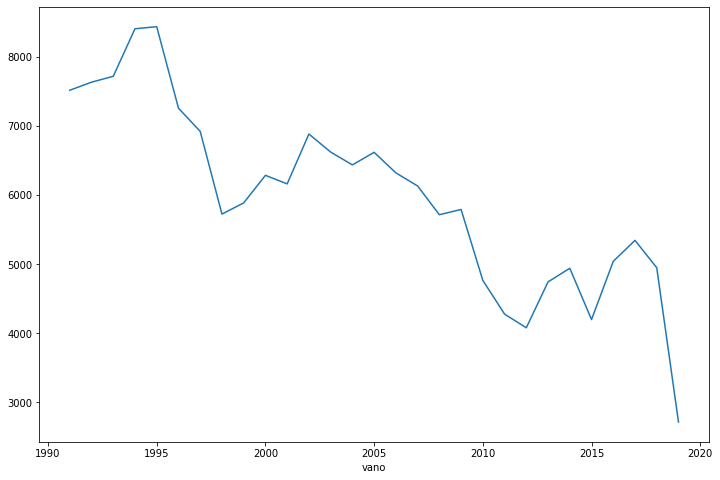

In [79]:
df_agrupado_por_ano["hom_doloso"].plot(figsize=(12,8));

Podemos ver pelo grafico acima que uma tendência de diminuição nos homicídios dolosos, em contra ponto os crimes de roubo à Transeunte dispararam de 1991 à 2018. 

#### Grafico de roubo de transeunte

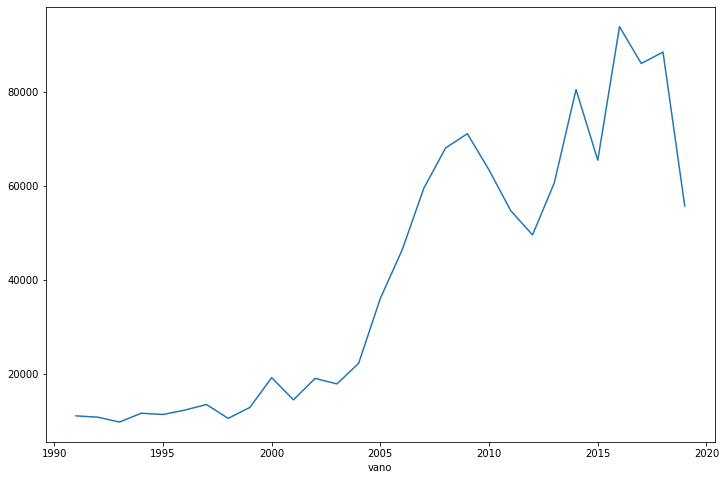

In [80]:
df_agrupado_por_ano["roubo_transeunte"].plot(figsize=(12,8));

#### Grafico de roubo de veiculos

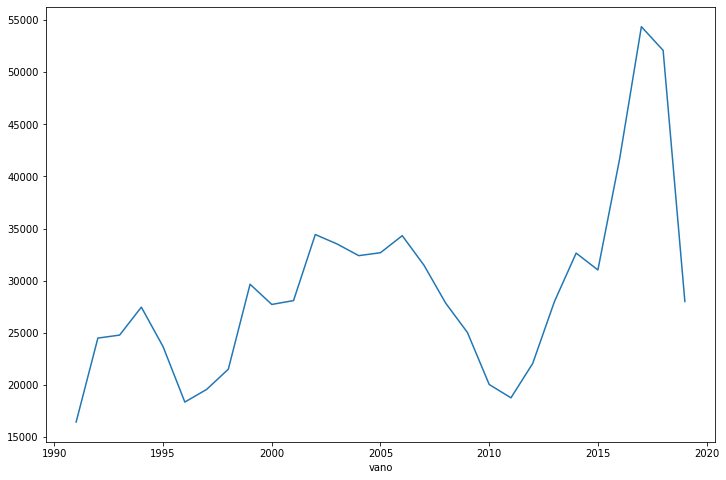

In [81]:
df_agrupado_por_ano["roubo_veiculo"].plot(figsize=(12,8));

## Conclusão

Como visto acima podemos tirar algumas conclusões. Os roubos de veiculos teve um aumento exponencial a partir de 2011, no entanto aproximadamente 43% desse veiculos são recuperados. A taxa de homicídios chegou ao ápice no ano de 1995, desde então há uma tendencia de queda, porém ainda continua entre as mais altas do Brasil. O roubo à transuente (Roubo que se efetiva no momento em que a pessoa a ser roubada está andando, caminhando.) foi o que se mostrou com a maior alto entre os roubos. 